In [1]:
import numpy as np
import porepy as pp
from matplotlib import pyplot as plt
from thermal_runscript_4 import make_model, run_model
from plot_utils import *

common_params = {
    "geometry": "4h_steady",
    "save_matrix": False,
    "solver": "CPR",
    "grid_refinement": 1,
}

print("Running steady state")
params = {
    "steady_state": True,
} | common_params
run_model(params)
end_state_filename = params["end_state_filename"]

print("Running injection")
params = {
    "steady_state": False,
    "initial_state": end_state_filename,
    "end_time": 2e2,
} | common_params
model = run_model(params)

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


Running steady state

stats_thermal_geo4h_steadyx1_solCPR

Sim time: 1.00e+00, Dt: 1.00e+00 (days)
Temperature: 393.00, 393.00
Peclet: 0.0e+00, CFL: 9.5e-17
sticking: 71, sliding: 0, open: 0


/home/porepy/.local/lib/python3.11/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)


Construction took: 0.07
  0 KSP Residual norm 8.637935874374e+00 
  1 KSP Residual norm 8.179618792292e-01 
  2 KSP Residual norm 1.964696765934e-01 
  3 KSP Residual norm 4.733392634493e-02 
  4 KSP Residual norm 1.579870678080e-02 
  5 KSP Residual norm 3.753769425377e-03 
  6 KSP Residual norm 7.529443555210e-04 
  7 KSP Residual norm 1.328714179093e-04 
  8 KSP Residual norm 4.116724537968e-05 
  9 KSP Residual norm 2.314855102982e-05 
 10 KSP Residual norm 7.411557024515e-06 
 11 KSP Residual norm 1.521094827357e-06 
 12 KSP Residual norm 2.873963791099e-07 
 13 KSP Residual norm 5.456681119733e-08 
 14 KSP Residual norm 7.688004380366e-09 
 15 KSP Residual norm 1.098089621765e-09 
 16 KSP Residual norm 1.766180892275e-10 
 17 KSP Residual norm 2.352582463543e-11 
 18 KSP Residual norm 3.632107290680e-12 
Solve took: 0.05
Newton iter: 0, Krylov iters: 19

Sim time: 2.00e+00, Dt: 1.00e+00 (days)
Temperature: 393.00, 393.00
Peclet: 2.9e-12, CFL: 1.9e-16
sticking: 71, sliding: 0, ope

In [2]:
# model.load_data_from_pvd(Path('/home/porepy/volume/nrec_fhm/visualization_2d/data_000043.pvd'), times_file=Path('/home/porepy/volume/nrec_fhm/visualization_2d/times.json'), is_mdg_pvd=True)

In [3]:
subdomains = model.mdg.subdomains()
source_loc_x = 1000
source_loc_y = 1000
fractures = [sd for sd in subdomains if sd.dim == model.nd - 1]

x, y, z = np.concatenate([sd.cell_centers for sd in fractures], axis=1)
source_loc = np.argmin((x - source_loc_x) ** 2 + (y - source_loc_y) ** 2)
x_well, y_well = x[source_loc], y[source_loc]
x_well, y_well

(868.7169492127791, 1052.1425890521396)

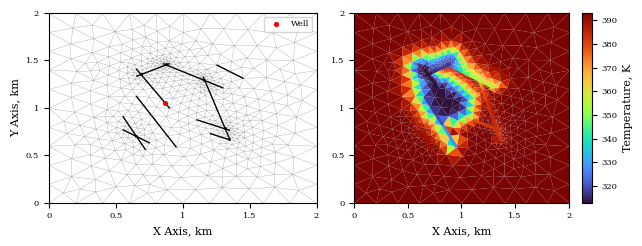

In [4]:
from matplotlib import pyplot as plt

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
}

plt.rcParams.update(tex_fonts)

width = 470 / 72
height = 180 / 72

fig, ax = plt.subplots(1, 2, figsize=(width, height))
pp.plot_grid(model.mdg, plot_2d=True, alpha=0., fracturewidth_1d=1, linewidth=0.1, if_plot=False, axis=ax[0])
pp.plot_grid(model.mdg, cell_value='temperature', plot_2d=True, alpha=1, fracturewidth_1d=2, linewidth=0, if_plot=False, color_map='turbo', axis=ax[1])

ax[0].set_xlabel('X Axis, km')
ax[1].set_xlabel('X Axis, km')
ax[0].set_ylabel('Y Axis, km')
ax[1].set_ylabel('')
ax[0].set_title('')
ax[1].set_title('')
ax[0].set_xticks([0,500,1000,1500,2000], [0, 0.5, 1, 1.5, 2])
ax[1].set_xticks([0,500,1000,1500,2000], [0, 0.5, 1, 1.5, 2])
ax[0].set_yticks([0,500,1000,1500,2000], [0, 0.5, 1, 1.5, 2])
ax[1].set_yticks([0,500,1000,1500,2000], [0, 0.5, 1, 1.5, 2])

ax[0].scatter(x_well, y_well, label='Well', marker='.', s=30, color='red')
ax[0].legend()
plt.tight_layout()

plt.savefig('tmp.pdf')